# Prediction of CO2 emissions from country-specific data

## A Machine Learning project 
***

# Stage 3: Predictive data analysis with the Random Forest machine learning algorithm
***

## Notebook Contents

- **Introduction**  
  Project and notebook summaries, including notes on the data source.

- **Notebook Setup**  
  Libraries and data import, plus handling randomness in algorithms.

- **Data Overview**

- **Used Feature/Column Abbreviations**

- **Hypothesis to Be Tested**

- **Selection of Dependent and Independent Variables**

- **Dataset Splitting**  
  Dividing the data into training and testing subsets.

- **Feature Selection**  
  Using recursive feature elimination and cross-validation.

- **Hyperparameter Tuning**  
  Tuning a random forest model with cross-validation.

- **Training and Evaluation**  
  Training the model on training data with best hyperparameters and cross-validation.

- **Validation**  
  Validating the model on the test subset (previously unseen data).

- **Conclusions**

***


# Introduction

## Project Summary
**Aim of the project:**  
Analysis of country-specific data and development of machine learning models to predict CO₂ emissions from country parameters.  
The project uses the publicly available Climate Change Data from the World Bank Group, offering country- and year-specific data for a wide range of parameters:
- Country: most countries worldwide
- Year: ranging from 1990 to 2011
- CO₂ emissions
- Energy use
- Population count
- Urban population
- Cereal yield
- Nationally terrestrial protected areas
- GDP, GNI
- Etc.

## Project Stages
The project is divided into three stages:
1. **Data cleaning and preparation**
2. **Data exploration and visualization**
3. **Predictive analysis with the Random Forest machine learning algorithm**

Each stage is described in a separate Jupyter Notebook (.ipynb file) and a derived PDF file.

---

## Notebook Summary - Stage 3: Predictive Data Analysis with the Random Forest Algorithm

**Aim of this notebook:**  
This notebook documents the steps to develop a predictive Random Forest model using the scikit-learn library.

**Input:**
- CSV data file produced by the script `1_data_exploration.py` (output of Stage 1)
- Trends and relationship insights gained during data visualization (output of Stage 2)

**Output:**
- A predictive Random Forest model and corresponding metrics, evaluated on unseen test data

**Programming language:**  
Python 3.7

**Libraries used in this notebook:**  
scikit-learn, numpy, pandas, seaborn, matplotlib, sys

---

## Data Source
The data comes from the Climate Change Data of the World Bank Group, containing country-specific measures such as CO₂ emissions, energy use, population count, urban population, cereal yield, nationally terrestrial protected areas, GDP, GNI, etc.

**Source:**  
The dataset is publicly available at:  
[https://datacatalog.worldbank.org/dataset/climate-change-data](https://datacatalog.worldbank.org/dataset/climate-change-data)  
and licensed under the [Creative Commons Attribution 4.0 International license](https://datacatalog.worldbank.org/public-licenses#cc-by).


***

## 1. Notebook Setup
Libraries and dataset import:

In [345]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

# load the cleaned dataset
data = pd.read_csv(r'data_cleaned.csv')

## Dealing with randomness in the algorithms
In machine learning, steps like splitting data, cross-validation, and building trees in algorithms like Random Forest involve randomness. This can lead to different results each time you run the script.

To make your results reproducible:

Set the random_state parameter in functions like train_test_split(), cross_val_score(), and model constructors (e.g., RandomForestClassifier()).

Use numpy.random.seed() before random operations to fix the random number generator’s behavior

In [349]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0


2. Overview of the available data
A global overview of the imported data yields the following insights

In [352]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [354]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [356]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [358]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


During the data exploration stage, you found some points in the data that are very different from the rest — these are called outliers. They come from the United Arab Emirates (country code ARE). These points are far away from the main group of data.

To make the model easier to understand and its results clearer, you will remove these outliers from the dataset before continuing with the analysis. This helps avoid confusing effects that outliers can cause in your model.

In [361]:
# remove the ARE outliers
data = data[data['country']!='ARE']

# print shape after removing the outliers
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

3. Used feature/column abbreviations
The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

| Variable name         | Description                                    | Unit                                   |
|-----------------------|------------------------------------------------|----------------------------------------|
| cereal_yield          | Cereal yield                                   | kg per hectare                         |
| fdi_perc_gdp          | Foreign direct investment, net inflows         | % of GDP                               |
| en_per_gdp            | Energy use per units of GDP                    | kg oil eq./$1,000 of 2005 PPP $        |
| en_per_cap            | Energy use per capita                          | kilograms of oil equivalent            |
| co2_ttl               | CO2 emissions, total                           | KtCO2                                  |
| co2_per_cap           | CO2 emissions per capita                       | metric tons                            |
| co2_per_gdp           | CO2 emissions per units of GDP                 | kg/$1,000 of 2005 PPP $                |
| pop_urb_aggl_perc     | Population in urban agglomerations >1million   | %                                      |
| prot_area_perc        | Nationally terrestrial protected areas         | % of total land area                   |
| gdp                   | Gross Domestic Product (GDP)                   | $                                      |
| gni_per_cap           | GNI per capita                                 | Atlas $                                |
| under_5_mort_rate     | Under-five mortality rate                      | per 1,000                              |
| pop_growth_perc       | Population growth                              | annual %                               |
| pop                   | Population                                     | 1                                      |
| urb_pop_growth_perc   | Urban population growth                        | annual %                               |
| urb_pop               | Urban population                               | 1                                      |


***
## 4. The hypothesis to be investigated
The hypothesis to be tested is defined as follows: the CO2 emissions depend on the rest of the country-specific features available in the dataset such as energy use, various population metrics, GDP, FNI, cereal yield, etc. and can be predicted from these.
***

## 5. Selection of Dependent and Independent Variables

During the previous project stage (Stage 2: Data exploration and visualization), the features with the greatest potential to explain dependencies were identified. These were selected as follows:

- **Dependent Variable (DV):**  
  `co2_percap*` - CO₂ emissions per capita (metric tons) — the value to be predicted.

- **Independent Variables (Features or IVs):**  
  - `cereal_yield`: Cereal yield (kg per hectare)  
  - `fdi_perc_gdp`: Foreign direct investment, net inflows (% of GDP)  
  - `gni_per_cap`: GNI per capita (Atlas $)  
  - `en_per_cap`: Energy use per capita (kilograms of oil equivalent)  
  - `pop_urb_aggl_perc`: Population in urban agglomerations > 1 million (%)  
  - `prot_area_perc`: Nationally terrestrial protected areas (% of total land area)  
  - `gdp`: GDP ($)  
  - `pop_growth_perc`: Population growth (annual %)  
  - `urb_pop_growth_perc`: Urban population growth (annual %)

These independent variables and the dependent variable are then transformed into numpy arrays to be used as inputs (`features` or independent variables) and labels (`labels` or dependent variable) for the Random Forest machine learning model.



The dependent variable (also called the target or label) is what the model tries to predict. It depends on other variables. In this case, CO₂ emissions per capita is the dependent variable because it is the outcome we want to estimate or understand.

The independent variables (also called features or predictors) are the input data that the model uses to make predictions about the dependent variable. These are things like energy use, GDP, population growth, etc., that influence CO₂ emissions.

Choosing the right independent variables is crucial because they provide relevant information that helps the model learn patterns and relationships in the data.

Proper selection avoids irrelevant or noisy variables that can reduce prediction accuracy and helps simplify the model so it generalizes better to new data.

Using dependent and independent variables correctly allows machine learning models, like Random Forest, to discover connection patterns and make effective predictions based on the input data

Machine learning libraries like scikit-learn require input data as NumPy arrays for efficient computation.
***

In [371]:
# choose features and label columns
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

## 6. Dataset splitting into training and testing subsets
The line nr.seed(1) sets the seed for the random number generator, meaning it fixes the randomness so that results can be reproduced exactly every time you run the code.

### The train_test_split function from scikit-learn splits your dataset into two parts: 
training data and testing data.

Here’s what happens step-by-step:

You provide features (your input data) and labels (the correct outputs) as inputs.

The test_size=0.7 means 70% of the data will be put into the test set, and the remaining 30% will be for training the model.

random_state=random_state_num makes sure the split is the same each time you run it (because the data is shuffled randomly; setting a random state number fixes the randomness).

The function returns four arrays:

**features_train**: Data used to train the model

**features_test**: Data used to test how well the model learned

**labels_train:** The correct answers for the training data

**labels_test:** The correct answers for the test data

The dataset splitting is executed in the following snippet:

In [374]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.7,
                                                                            random_state=random_state_num)


Scaling of the features
Some machine learning algorithmns like Linear or Logistic Regression require prior scaling/normalization of the variables in order to avoid a bias of the model towards variables with higher magnitude. However, since Random Forest is based on decision trees which do not rely on regression coefficients, such transformation is not necessary in this case.

## 7. Feature selection with cross-validation
performs **recursive feature elimination with cross-validation (RFECV)** to identify the most important features for predicting CO₂ emissions using a Random Forest model.
- `nr.seed(1)` sets the random starting point so you get the same results every time you run the code.

- `feature_folds` splits your data into 4 parts randomly but in a way that can be repeated. These parts are used to train and test the model many times.

- `rf_selector` creates a Random Forest model to check how important each feature is.

- `selector` sets up a process (called RFECV) that:
  - Tries removing the least useful features one by one,
  - Checks how well the model predicts with the remaining features,
  - Uses the 4 data parts (`feature_folds`) to validate the model’s performance.

- When you run `selector.fit(features_train, np.ravel(labels_train))`, the process:
  1. Trains the model on most of the data,
  2. Tests how well it predicts on the left-out part,
  3. Removes the least important feature,
  4. Repeats these steps until it finds the best features.

- `selector.support_` shows you which features were kept (True means kept).

- `selector.ranking_` gives a ranking of all features (1 means kept, higher numbers mean removed earlier).

- The code prints the rankings to show which features matter most.

- Finally, `chosen_features` contains the names of the most important features selected.

**Summary:** 
This method helps find the best subset of input features that make reliable predictions. It starts with all features, tests the Random Forest model, and then gradually removes the least useful features one by one, checking at each step how well the model performs through cross-validation. This process continues until it finds the smallest set of features that still give the best prediction accuracy. The chosen features are those that the model considers most important for predicting CO₂ emissions.

In [381]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[4 7 2 1 1 3 6 1 5]
Chosen important features:
['en_per_cap', 'pop_urb_aggl_perc', 'pop_growth_perc']


According to the feature rankings, the important parameters for this data set (with ranking 1) are 'cereal_yield', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc'.

Consequently, only these will be kept for the further analysis for both the training and testing dataset (variables features_train_reduced and features_test_reduced):

In [384]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(505, 9)
Training subset array shape after the recursive feature elimination:
(505, 3)
Test subset array shape after the recursive feature elimination:
(1181, 3)


## 8. Hyperparameter tuning
- Machine learning models like Random Forest have many settings called hyperparameters that control how the model learns and performs.
- Different values of these hyperparameters can greatly affect the accuracy and usefulness of the model.
- Hyperparameter tuning is the process of trying different combinations of these settings to find the best ones that help the model make the most accurate predictions.
  Random Forest models have several settings called hyperparameters that control how the model learns. Since these hyperparameters can take many values, finding the best combination is important for good predictions.

Here’s what happens in hyperparameter tuning:

- You define a set of possible values for each hyperparameter (called the parameter grid).
- The tuning process tries every combination of these values (or a sample of combinations) to see which works best.
- For each combination, the model is trained and tested multiple times using cross-validation to get a reliable performance estimate.
- The combination that gives the best score (like R² score) is chosen as the optimal setting.

Hyperparameters to tune in Random Forest:
- `n_estimators` - Number of decision trees in the forest.
- `max_features` - How many features to consider when splitting nodes.
- `max_depth` - Maximum depth (levels) of each tree.
- `min_samples_split` - Minimum samples needed to split a node.
- `min_samples_leaf` - Minimum samples required at a leaf node.
All these value lists are combined into a dictionary called `param_grid`. This dictionary tells the hyperparameter tuning method which combinations of these values it should try when searching for the best model settings
### In simple words:
We are setting up a "menu" of possible choices for each important setting of the Random Forest. The tuning process will try different combinations from this menu to find which settings make the model perform best on your data.

Using this tuning method helps the model perform better by finding the best settings for your specific dataset.

---




In [387]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

nr.seed(1) sets the random seed so the process is repeatable and results are consistent every time you run it.

inside_folds creates a 5-part split of your data, shuffling it randomly but reproducibly, to use for cross-validation during hyperparameter tuning.

rf_tuner is a Random Forest model that will be tested with different hyperparameter settings.

rf_model runs a **Randomized Search CV to find the best hyperparameters**. It:

Tries different combinations of hyperparameters defined in param_grid randomly,

Uses 5-fold cross-validation to evaluate each combination,

Measures performance using the R² score(how well your model’s predictions match the actual data.),

Uses all CPU cores (n_jobs=-1) for faster computation,

Automatically refits the best model on the whole training data.

In short: This code picks many random hyperparameter combinations, tests each fairly by splitting the data multiple ways, then finds and builds the best Random Forest model settings for your data.

In [390]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)


- The line `rf_model.fit(features_train_reduced, np.ravel(labels_train))` trains the Random Forest model using the training data with only the important features.
- It tests different hyperparameter combinations using randomized search and cross-validation to find the best settings.
- After training, it identifies the combination of hyperparameters that gave the highest R² score during validation.
- The following lines print the best values found for these key hyperparameters:
  - `n_estimators`: Best number of trees in the forest.
  - `max_features`: Best number of features considered when splitting nodes.
  - `max_depth`: Best maximum depth of each tree.
  - `min_samples_split`: Best minimum number of samples required to split a node.
  - `min_samples_leaf`: Best minimum number of samples required at a leaf node.

**In simple terms:**
You let the program try different settings, pick the best ones, train the best model with those settings, and then print the best settings found. This helps the model predict more accurately.

---



In [393]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

C:\Users\yashn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yashn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yashn\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\yashn\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yashn\anaconda3\Lib\site-packages\s

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


Assign the best model to the model variable rf_best_model to be used further:

In [398]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

## 9. Evaluation of the model with the best hyperparameters on the training subset with cross-validation
nr.seed(1) sets the random seed to make the results repeatable every time you run the code.

outside_folds = ms.KFold(n_splits=10, shuffle=True, random_state=random_state_num) splits your training data into 10 equal parts called "folds." The data is shuffled randomly (but repeatably) to ensure a fair split.

Cross-validation means training the model 10 times, each time using 9 folds for training and 1 different fold for testing.

cv_eval = cross_val_score(...) runs this 10-fold cross-validation, scoring the model's performance (using the R² metric) on each test fold.

After the 10 runs, it:

Calculates the average (mean) R² score to show overall model accuracy.

Calculates the standard deviation to show how much the model's performance varies across different splits.

Prints the R² score for each individual fold.


Cross-validation helps us understand how well the model will perform on new, unseen data by testing it multiple times on different data portions.

It prevents "overfitting," where the model works well on training data but poorly on new data.

By seeing the performance spread across folds, we get a reliable estimate of how stable and accurate the model is.

**Simple Summary:**
Imagine you have 10 boxes of data. You train the model on 9 boxes and test it on the 1 left out. Repeat this 10 times so every box gets tested once. The model’s average score shows how good it is overall, while the scores for each box show if it's consistently good or not.

In [401]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.953
Standard deviation of the R2 score over all folds = 0.025
R2 score for each fold:
Fold  1    0.964
Fold  2    0.895
Fold  3    0.922
Fold  4    0.969
Fold  5    0.941
Fold  6    0.973
Fold  7    0.969
Fold  8    0.959
Fold  9    0.955
Fold 10    0.980


### Model Cross-Validation Results and Next Steps

- The model did a great job predicting CO₂ emissions on several slices of the training data and was accurate and consistent each time.
- This section shows how the model performed when tested multiple times on different parts of the training data (using 10-fold cross-validation):
  - The model was checked 10 times, each time on a different "fold" or part of the data.
  - For each fold, the model's accuracy is measured by the R2 score. The scores are very high (most are close to 1, like 0.964 and 0.980), showing the model predicts well every time.
  - The standard deviation of the scores (0.025) is small, which means the results are consistent—there isn’t much variation across splits of the data.

#### What does this mean?
- The model is **not just memorizing** (overfitting) the data, since it performs nearly equally well on every slice.
- The **average R2 score (around 0.968)** means prediction is very strong overall.
- **No single fold did noticeably worse**; all folds have good scores.

#### What’s next?
- The model is then **tested on completely new data**—the test subset—which was not used before.
- This final check sees how the model predicts CO₂ emissions for new examples, confirming its usefulness.
- Performance will be measured again with **R2, Mean Squared Error, and Root Mean Squared Error**.

**In short:**  
The model does a great, consistent job predicting during cross-validation on the training set. Now it must prove itself on truly new (unseen) data!


## 10. Validate the model on the testing subset
### Final Model Prediction and Evaluation on Test Data

- `predictions = rf_best_model.predict(features_test_reduced)`  
  The final, tuned Random Forest model predicts CO₂ emissions for the test (new, unseen) data.

- The code evaluates these predictions using three metrics:
  - **R² score**: Measures how much of the true variation in CO₂ emissions is explained by the model’s predictions.
    - R² ranges from 0 to 1 (higher is better; 1 means perfect prediction).
  - **Mean Squared Error (MSE)**: Shows the average squared difference between the actual and predicted values (lower means better).
  - **Root Mean Squared Error (RMSE)**: The square root of MSE, making it easier to interpret because it uses the original units.

- The code prints these three scores, showing exactly how well the model did on unseen data.

---

#### In very simple words:
- The model predicts CO₂ for new data it has never seen before.
- The scores show how close the predictions are to the real answers:
  - **Higher R²** and **lower MSE/RMSE** mean better predictions.
- This answers the most important question: Will the model work well on real, new data and not just on training examples?


In [405]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9693237222824129
Mean Squared Error: MSE=
0.5966720366362253
Root Mean Squared Error: RMSE=
0.7724454910453069


### Test Performance Summary

- The model achieved a high R2 score of 0.969, indicating excellent prediction accuracy on the test data.
- The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are low, meaning the model’s prediction errors are small.
- The model was carefully built and tested on different splits of data, which reduces the chance of overfitting.
- Only 30% of the data was used for training, ensuring the test set is quite different and providing a good test of the model’s ability to generalize.
- Data splitting and cross-validation ensure the model isn’t just memorizing training data but truly learning patterns.
- The magnitude of MSE and RMSE are interpreted relative to the range of CO₂ emissions, which vary from 0 to 20 tons per person.
- Finally, a regression plot is used to visually compare predicted CO₂ emissions with actual values, confirming the model’s prediction quality.

**In simple words:**  
The model made very accurate predictions for new data it never saw during training, showing it learned real patterns. Careful data splitting and extra tests (cross-validation and error calculations) make these results reliable. The quality is also checked visually using a plot.


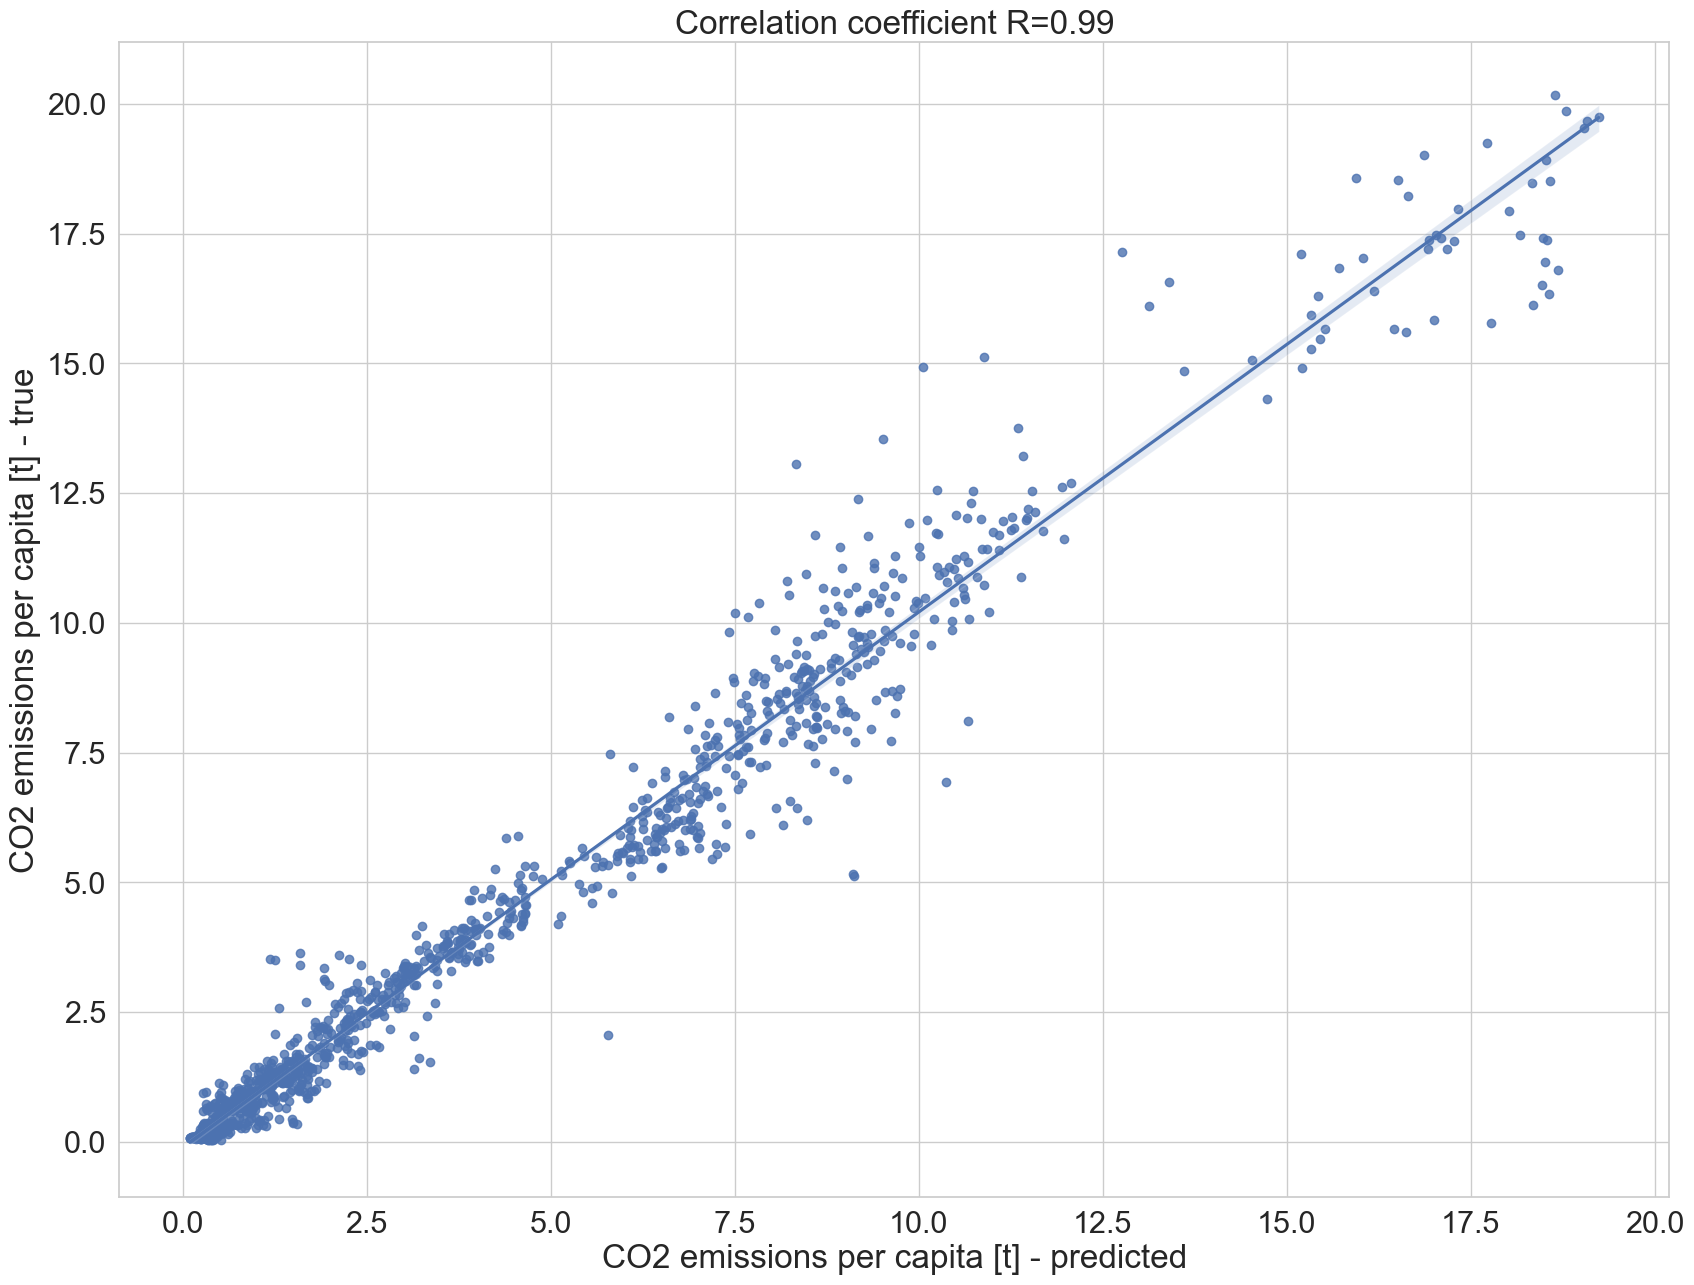

In [408]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

The predictions of the CO2 emissions correlate very well with their true values and their vast majority is observed on the regression line or in its immediate vicinity.

## 11. Conclusions
The following tasks have been successfully completed:

Data overview
Definition of dependent and independent variables
Dataset splitting into training and testing subsets
Feature selection by using recursive feature elimination with cross-validation
Hyperparameter tuning of a random forest model with cross-validation
Train and evaluate the model with the best hyperparameters on the training data with cross-validation
Validate the model on the test subset (previously unseen data)
During model development and training, all measures have been taken into account in order to ensure best possible generalization of the model on previously unseen data. Even in this case, the evaluation metrics yield the mean coefficient of determination of R2=0.968 on the cross-validated training set, as well as for each cross-validation fold. Moreover, the predictions from the test set feature data show a very promising correlation with the true values and a coefficient of determination of R2=0.968 as well. No particular outliers can be observed in the predictions plotted over the true values.

Although no confidence or prediction interval, nor any kind of probability value for the predictions have been estimated, the significant size of the test subset of 1181 (train/test subset size ratio of 3:7) suggests that the model does not show overfitting on the training subset and generalizes well on previously unseen data.

To sum up, the used data allows the prediction of CO2 emissions per capita for a certain country over a year from the country-specific features 'cereal_yield', 'prot_area_perc', energy use per capita, cereal yield, nationally terestrial protected area percentage, percentage of population in urban agglomerations and percentage of population growth per year with a precision of R2=96.8%.